In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from help_functions.evaluate_daxmodels import evaluate_different_daxmodels

from dax.help_functions.get_dax_data import get_prepared_data
#from dax.models.time_series_models.garch11_norm import get_garch_11_norm
#from dax.models.time_series_models.garch11_t import get_garch_11_t
from dax.models.ARMA_GARCH.arma_garch import get_arma_garch11_forecasts, get_arma_garch_opt_pq_forecasts, get_arma_garch_opt_pq_lag_forecasts
from dax.models.ARMA_GARCH.garch11_t import get_garch_11_t
from dax.models.baseline import get_dax_forecasts_baseline
from dax.models.quantile_regression import get_quantile_regression_forecasts
# from dax.models.combination.combined_models import combine_models

In [25]:
dax_df = get_prepared_data()
dax_df = dax_df[:-15]
dax_df

,Close,LogRetLag1,LogRetLag2,LogRetLag3,LogRetLag4,LogRetLag5
Date,,,,,,
2019-09-10 00:00:00+02:00,12268.709961,0.347914,0.629422,1.163586,2.006097,2.960150
2019-09-11 00:00:00+02:00,12359.070312,0.733812,1.081725,1.363234,1.897398,2.739909
2019-09-12 00:00:00+02:00,12410.250000,0.413251,1.147063,1.494977,1.776485,2.310649
2019-09-13 00:00:00+02:00,12468.530273,0.468515,0.881766,1.615578,1.963491,2.245000
2019-09-16 00:00:00+02:00,12380.309570,-0.710062,-0.241547,0.171704,0.905516,1.253429
...,...,...,...,...,...,...
2023-12-11 00:00:00+01:00,16794.429688,0.209867,0.989969,0.825037,1.568227,2.347574
2023-12-12 00:00:00+01:00,16791.740234,-0.016015,0.193852,0.973954,0.809022,1.552211
2023-12-13 00:00:00+01:00,16766.050781,-0.153106,-0.169121,0.040746,0.820848,0.655916


In [61]:
# check if functions work
baseline = {
    'name': 'baseline',
    'function': get_dax_forecasts_baseline
}
quantile_regression = {
    'name': 'Quantile Regression',
    'function': get_quantile_regression_forecasts
}

garch11 = {
    'name': 'GARCH(1,1)',
    'function': get_arma_garch11_forecasts
}

garch11_opt_pq = {
    'name': 'GARCH(p,q)',
    'function': get_arma_garch_opt_pq_forecasts
}

garch11_opt_lags_pq = {
    'name': 'GARCH(p,q, lags)',
    'function': get_arma_garch_opt_pq_lag_forecasts
}

models = [garch11,baseline, quantile_regression, garch11_opt_pq, garch11_opt_lags_pq] 

In [65]:
evaluation = evaluate_different_daxmodels(models,dax_df, last_x=100, years=False, months=False, weeks=True)

c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\Maria\Documents\Setups\Lib\site-packages\statsm

## Visualize Comparsion

In [66]:
mean_scores = {
    'mean_scores_garch11': np.mean(models[0]['evaluation']['score']),
    'mean_scores_baseline': np.mean(models[1]['evaluation']['score']),
    'mean_scores_quantile':np.mean(models[2]['evaluation']['score']),
    'mean_scores_garchpq': np.mean(models[3]['evaluation']['score']),
    'mean_scores_garchpqlag': np.mean(models[4]['evaluation']['score']) }
mean_scores

{'mean_scores_garch11': 4.663613740067654,
 'mean_scores_baseline': 4.546631996926607,
 'mean_scores_quantile': 4.490453776130911,
 'mean_scores_garchpq': 4.616590435574339,
 'mean_scores_garchpqlag': 4.66997728692028}

In [67]:
horizons = ['1 day', '2 day', '5 day', '6 day', '7 day']
quantile_scores_per_model = {}

for m in range(0,5):
    quantile_scores = {}
    evaluation_frame = models[m]['evaluation']
    for h in horizons: 
        day_frame = evaluation_frame.loc[evaluation_frame['horizon'] == h]
        quantile_scores.update({h: np.mean(day_frame['score'])})
    
    quantile_scores_per_model.update({models[m]['name']: quantile_scores})

quantile_scores_per_model
    

{'GARCH(1,1)': {'1 day': 2.863571926179659,
  '2 day': 4.108705033094418,
  '5 day': 4.862347120136229,
  '6 day': 5.246309181672678,
  '7 day': 6.1650451171881056},
 'baseline': {'1 day': 2.849511752143768,
  '2 day': 4.061040814484406,
  '5 day': 4.856265502755015,
  '6 day': 4.992555019023509,
  '7 day': 5.906969199474554},
 'Quantile Regression': {'1 day': 2.796116331520955,
  '2 day': 4.0280471402366,
  '5 day': 4.7919492868768,
  '6 day': 4.889912888708632,
  '7 day': 5.880220455336946},
 'GARCH(p,q)': {'1 day': 2.8660629016159276,
  '2 day': 4.064058606400258,
  '5 day': 4.827372362234223,
  '6 day': 5.1331596723887944,
  '7 day': 6.121796817993745},
 'GARCH(p,q, lags)': {'1 day': 2.882711465641354,
  '2 day': 4.143085077508723,
  '5 day': 5.076112960614448,
  '6 day': 5.113058211436929,
  '7 day': 6.06407714703187}}

In [68]:
# create table only containing different scores of different models

horizons = ['1 day', '2 day', '5 day', '6 day', '7 day']
scores = []
names = []
for h in horizons:
    for m in models:
        col_name = f'{m["name"]}: {h}'
        scores.append(m['evaluation']['score']
                      [m['evaluation']['horizon'] == h])
        names.append(col_name)

score_df = pd.concat(scores, axis=1, keys=names)

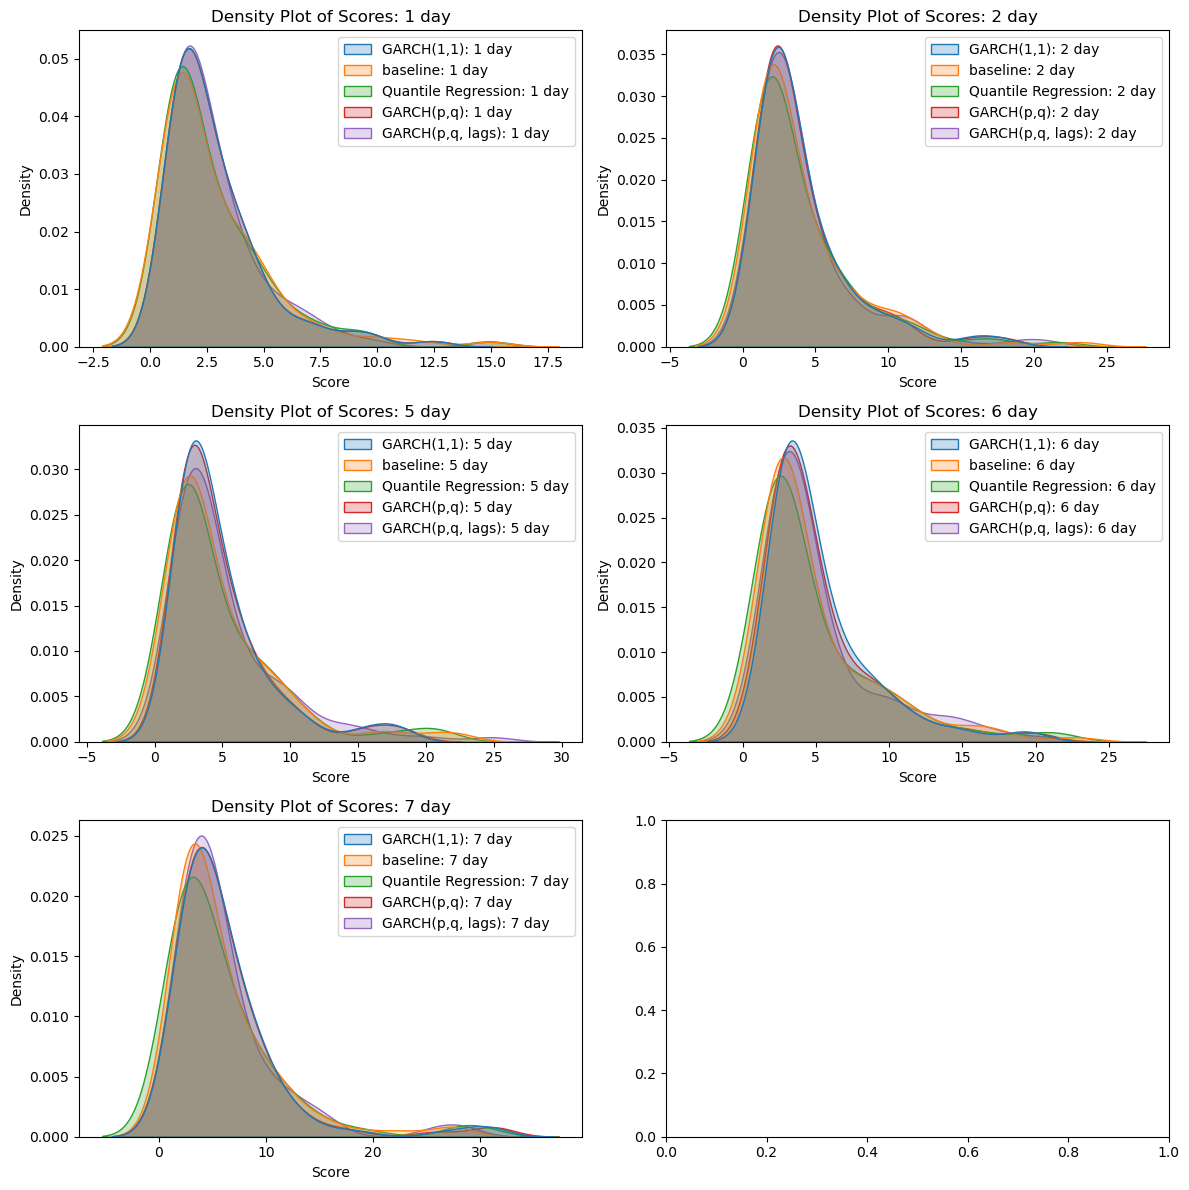

In [69]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Loop through each horizon
for i, h in enumerate(horizons):
    # Select columns related to the current horizon
    relevant_cols = [f'{m["name"]}: {h}' for m in models]

    # Filter the relevant data for the current horizon
    data_subset = score_df.loc[:, relevant_cols]

    # Create a KDE plot for the current horizon
    sns.kdeplot(data=data_subset, fill=True, ax=axes[i])

    # Set labels and title for each subplot
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Density Plot of Scores: {h}')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Display the plots
plt.show()

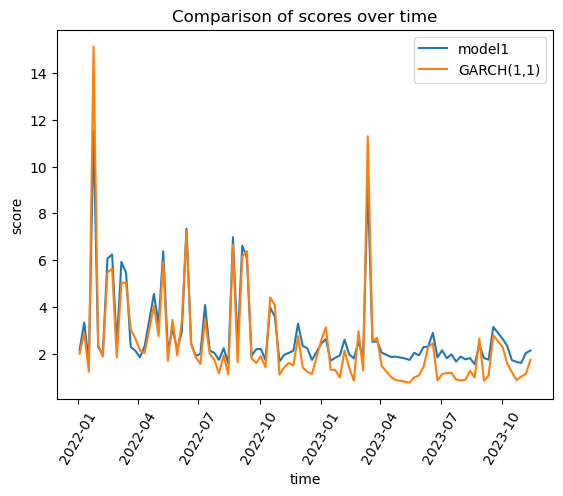

In [9]:
# Plot values from two columns over time
score_df_1d_no_na = score_df[score_df['model1: 5 day'].notna()]
score_df_garch_no_na = score_df[score_df['GARCH(1,1) model: 5 day'].notna()]

plt.plot(score_df_1d_no_na.index,
         score_df_1d_no_na['model1: 5 day'], label='model1')
plt.plot(score_df_garch_no_na.index, score_df_garch_no_na['GARCH(1,1) model: 5 day'], label='GARCH(1,1)')

# Adding labels and title
plt.xlabel('time')
plt.xticks(rotation=60)
plt.ylabel('score')
plt.title('Comparison of scores over time')

# Display legend
plt.legend()

# Show the plot
plt.show()

### Interpretation
GARCH(1,1) better than baseline (model1). 